# Import Modules

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)

# Loading the dataset

In [13]:
df = pd.read_csv("/Users/kirtan/Downloads/iris.data")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#display stats about data
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#basic info about data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
#display number of samples on each class
df['Iris-setosa'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

# Preprocessing the dataset

In [17]:
#check null values
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

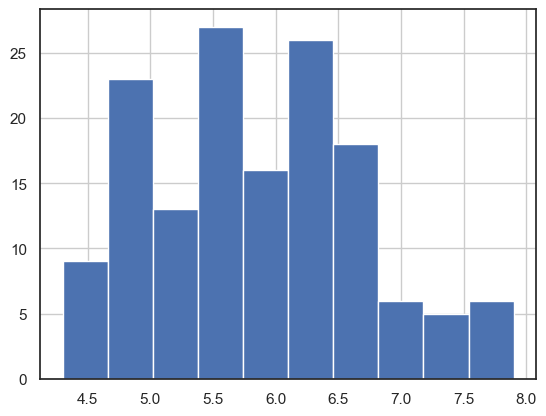

In [20]:
#histograms
df['5.1'].hist()

<AxesSubplot:>

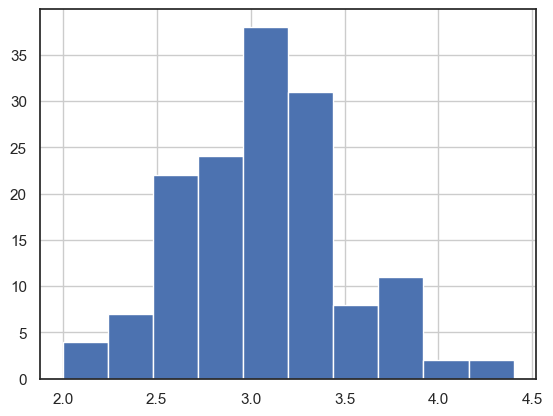

In [21]:
df['3.5'].hist()

<AxesSubplot:>

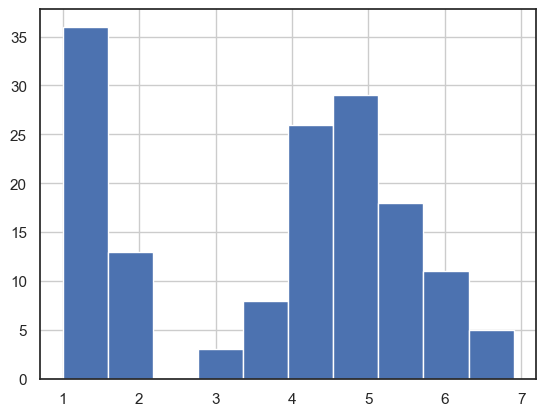

In [22]:
df['1.4'].hist()

<AxesSubplot:>

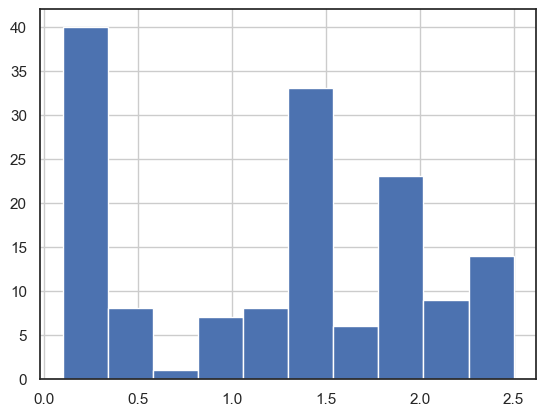

In [23]:
df['0.2'].hist()

In [28]:
#scatterplot
colors = ['black', 'pink' , 'green']
species = ['Iris-versicolor','Iris-virginica','Iris-setosa']

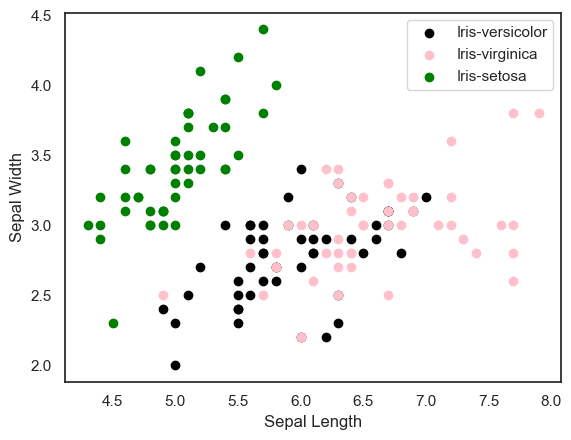

In [30]:
for i in range(3):
    x = df[df['Iris-setosa'] == species[i]]
    plt.scatter(x['5.1'], x['3.5'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

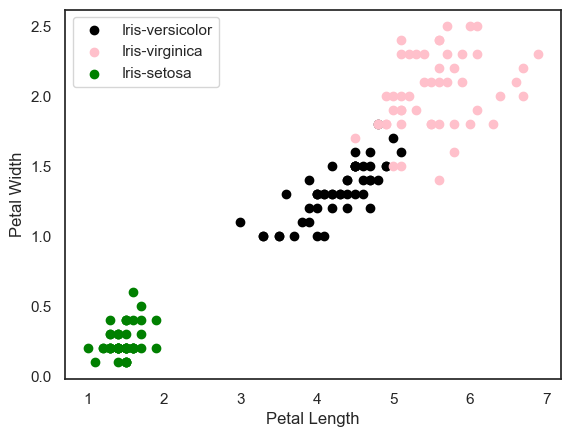

In [31]:
for i in range(3):
    x = df[df['Iris-setosa'] == species[i]]
    plt.scatter(x['1.4'], x['0.2'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

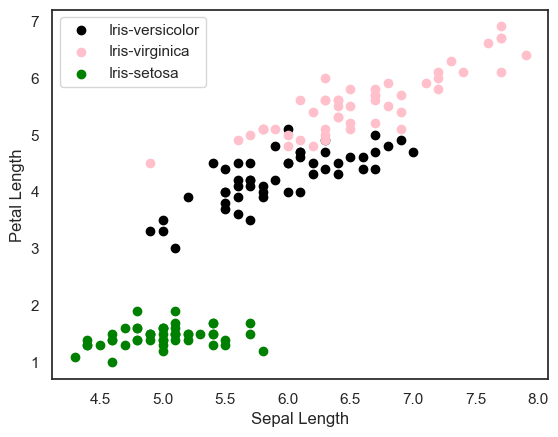

In [32]:
for i in range(3):
    x = df[df['Iris-setosa'] == species[i]]
    plt.scatter(x['5.1'], x['1.4'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

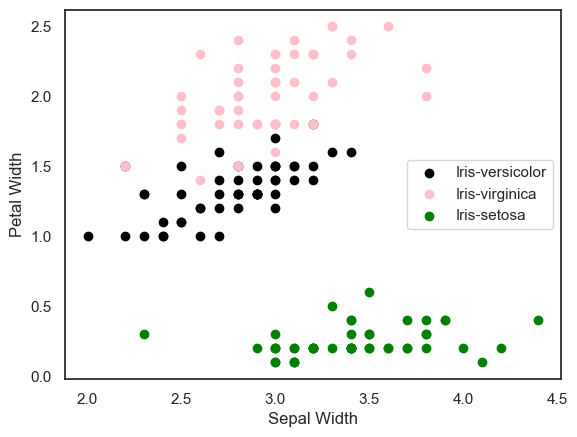

In [34]:
for i in range(3):
    x = df[df['Iris-setosa'] == species[i]]
    plt.scatter(x['3.5'], x['0.2'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix

In [35]:
df.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,-0.103784,0.871283,0.816971
3.5,-0.103784,1.000000,-0.415218,-0.350733
1.4,0.871283,-0.415218,1.000000,0.962314
0.2,0.816971,-0.350733,0.962314,1.000000


<AxesSubplot:>

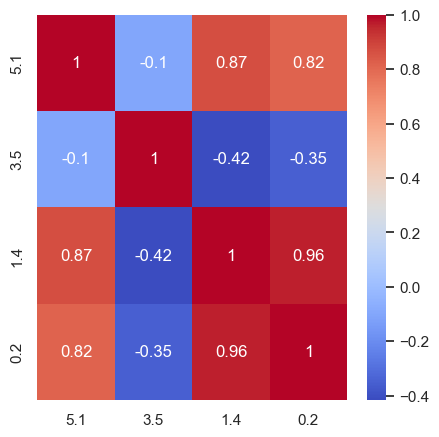

In [38]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax,cmap = 'coolwarm')

# Label Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [40]:
df['Iris-setosa'] = le.fit_transform(df['Iris-setosa'])
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# Model Training

In [68]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
x = df.drop(columns=['Iris-setosa'])
y = df['Iris-setosa']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [69]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [70]:
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
#print matrix to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [72]:
#knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [73]:
#model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
#print matrix to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)


Accuracy:  97.77777777777777


In [81]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [82]:
#model training
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
#print matrix to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777
